# Verwenden statistischer Größen der Zeitreihen als Features

Korrelation etc.

In [1]:
import io, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from sklearn import model_selection, svm, metrics, manifold, preprocessing
import joblib

import prepare

In [2]:
BASE_DIR = 'renamed'
DATA_OK = ['ok', 'near_ok_sonowechsel']
DATA_FEHLER = ['fehler_oel', 'fehler_leitungsversatz', 'fehler_terminversatz']
DATA_ALL = DATA_OK + DATA_FEHLER

In [3]:
DATA_ALL

['ok',
 'near_ok_sonowechsel',
 'fehler_oel',
 'fehler_leitungsversatz',
 'fehler_terminversatz']

In [4]:
zugversuche, kurven = prepare.read_all(BASE_DIR, DATA_ALL)

ok_: count 200 rows 1407...1650
near_ok_sonowechsel_: count 100 rows 1582...1759
fehler_oel_: count 100 rows 1052...1434
fehler_leitungsversatz_: count 100 rows 1716...2403
fehler_terminversatz_: count 100 rows 1702...2092


Debugausgabe

In [5]:
zugversuche

,nr,festigkeit,key,label,label_text
0,1569,2600.000000,ok_1569,0,ok
1,1570,2750.000000,ok_1570,0,ok
2,1571,2770.000000,ok_1571,0,ok
3,1572,2660.000000,ok_1572,0,ok
4,1573,2810.000000,ok_1573,0,ok
...,...,...,...,...,...
595,2505,1479.522827,fehler_terminversatz_2505,4,fehler_terminversatz
596,2506,2085.117920,fehler_terminversatz_2506,4,fehler_terminversatz
597,2507,2237.231201,fehler_terminversatz_2507,4,fehler_terminversatz
598,2508,2406.469482,fehler_terminversatz_2508,4,fehler_terminversatz


In [6]:
versuche_train, versuche_test = model_selection.train_test_split(zugversuche, test_size=0.2, random_state=42)
versuche_train.shape, versuche_test.shape

((480, 5), (120, 5))

Umwandeln in statistische Features

In [7]:
stat_feat = prepare.StatFeatures()
stat_feat.fit() # dummy

StatFeatures()

Untersuchen nur Trainingsdaten

In [8]:
X_train = stat_feat.transform(versuche_train.key, kurven)
label_train = versuche_train.label.values
festigkeit_train = versuche_train.festigkeit.values
print(X_train.shape, label_train.shape)

(480, 13) (480,)


Umwandeln in DataFrame zum einfacheren Analysieren

In [14]:
df = pd.DataFrame(X_train)
df.columns = ['p_mean', 'p_median', 'p_max', 'p_std',
           'f_mean', 'f_median', 'f_max', 'f_std',
           'd_mean', 'd_median', 'd_max', 'd_std',
           'ti']

Zielgröße Festigkeit hinzufügen

In [15]:
df['festigkeit'] = festigkeit_train

Korrelation der Features (Absolutbetrag) zur Zielgröße.

In [27]:
df.corr()['festigkeit'].abs().sort_values(ascending=False)

festigkeit    1.000000
p_max         0.861549
p_median      0.812366
p_mean        0.795196
ti            0.676238
p_std         0.663320
f_std         0.625415
f_max         0.487235
d_max         0.424856
d_std         0.376086
d_mean        0.353475
d_median      0.319570
f_median      0.302010
f_mean        0.277208
Name: festigkeit, dtype: float64

Stärkste Einflüsse: statistische Größen Power sowie Dauer

Scatter Matrix, Farbe ist Zielgröße (Achtung: recht langsam)

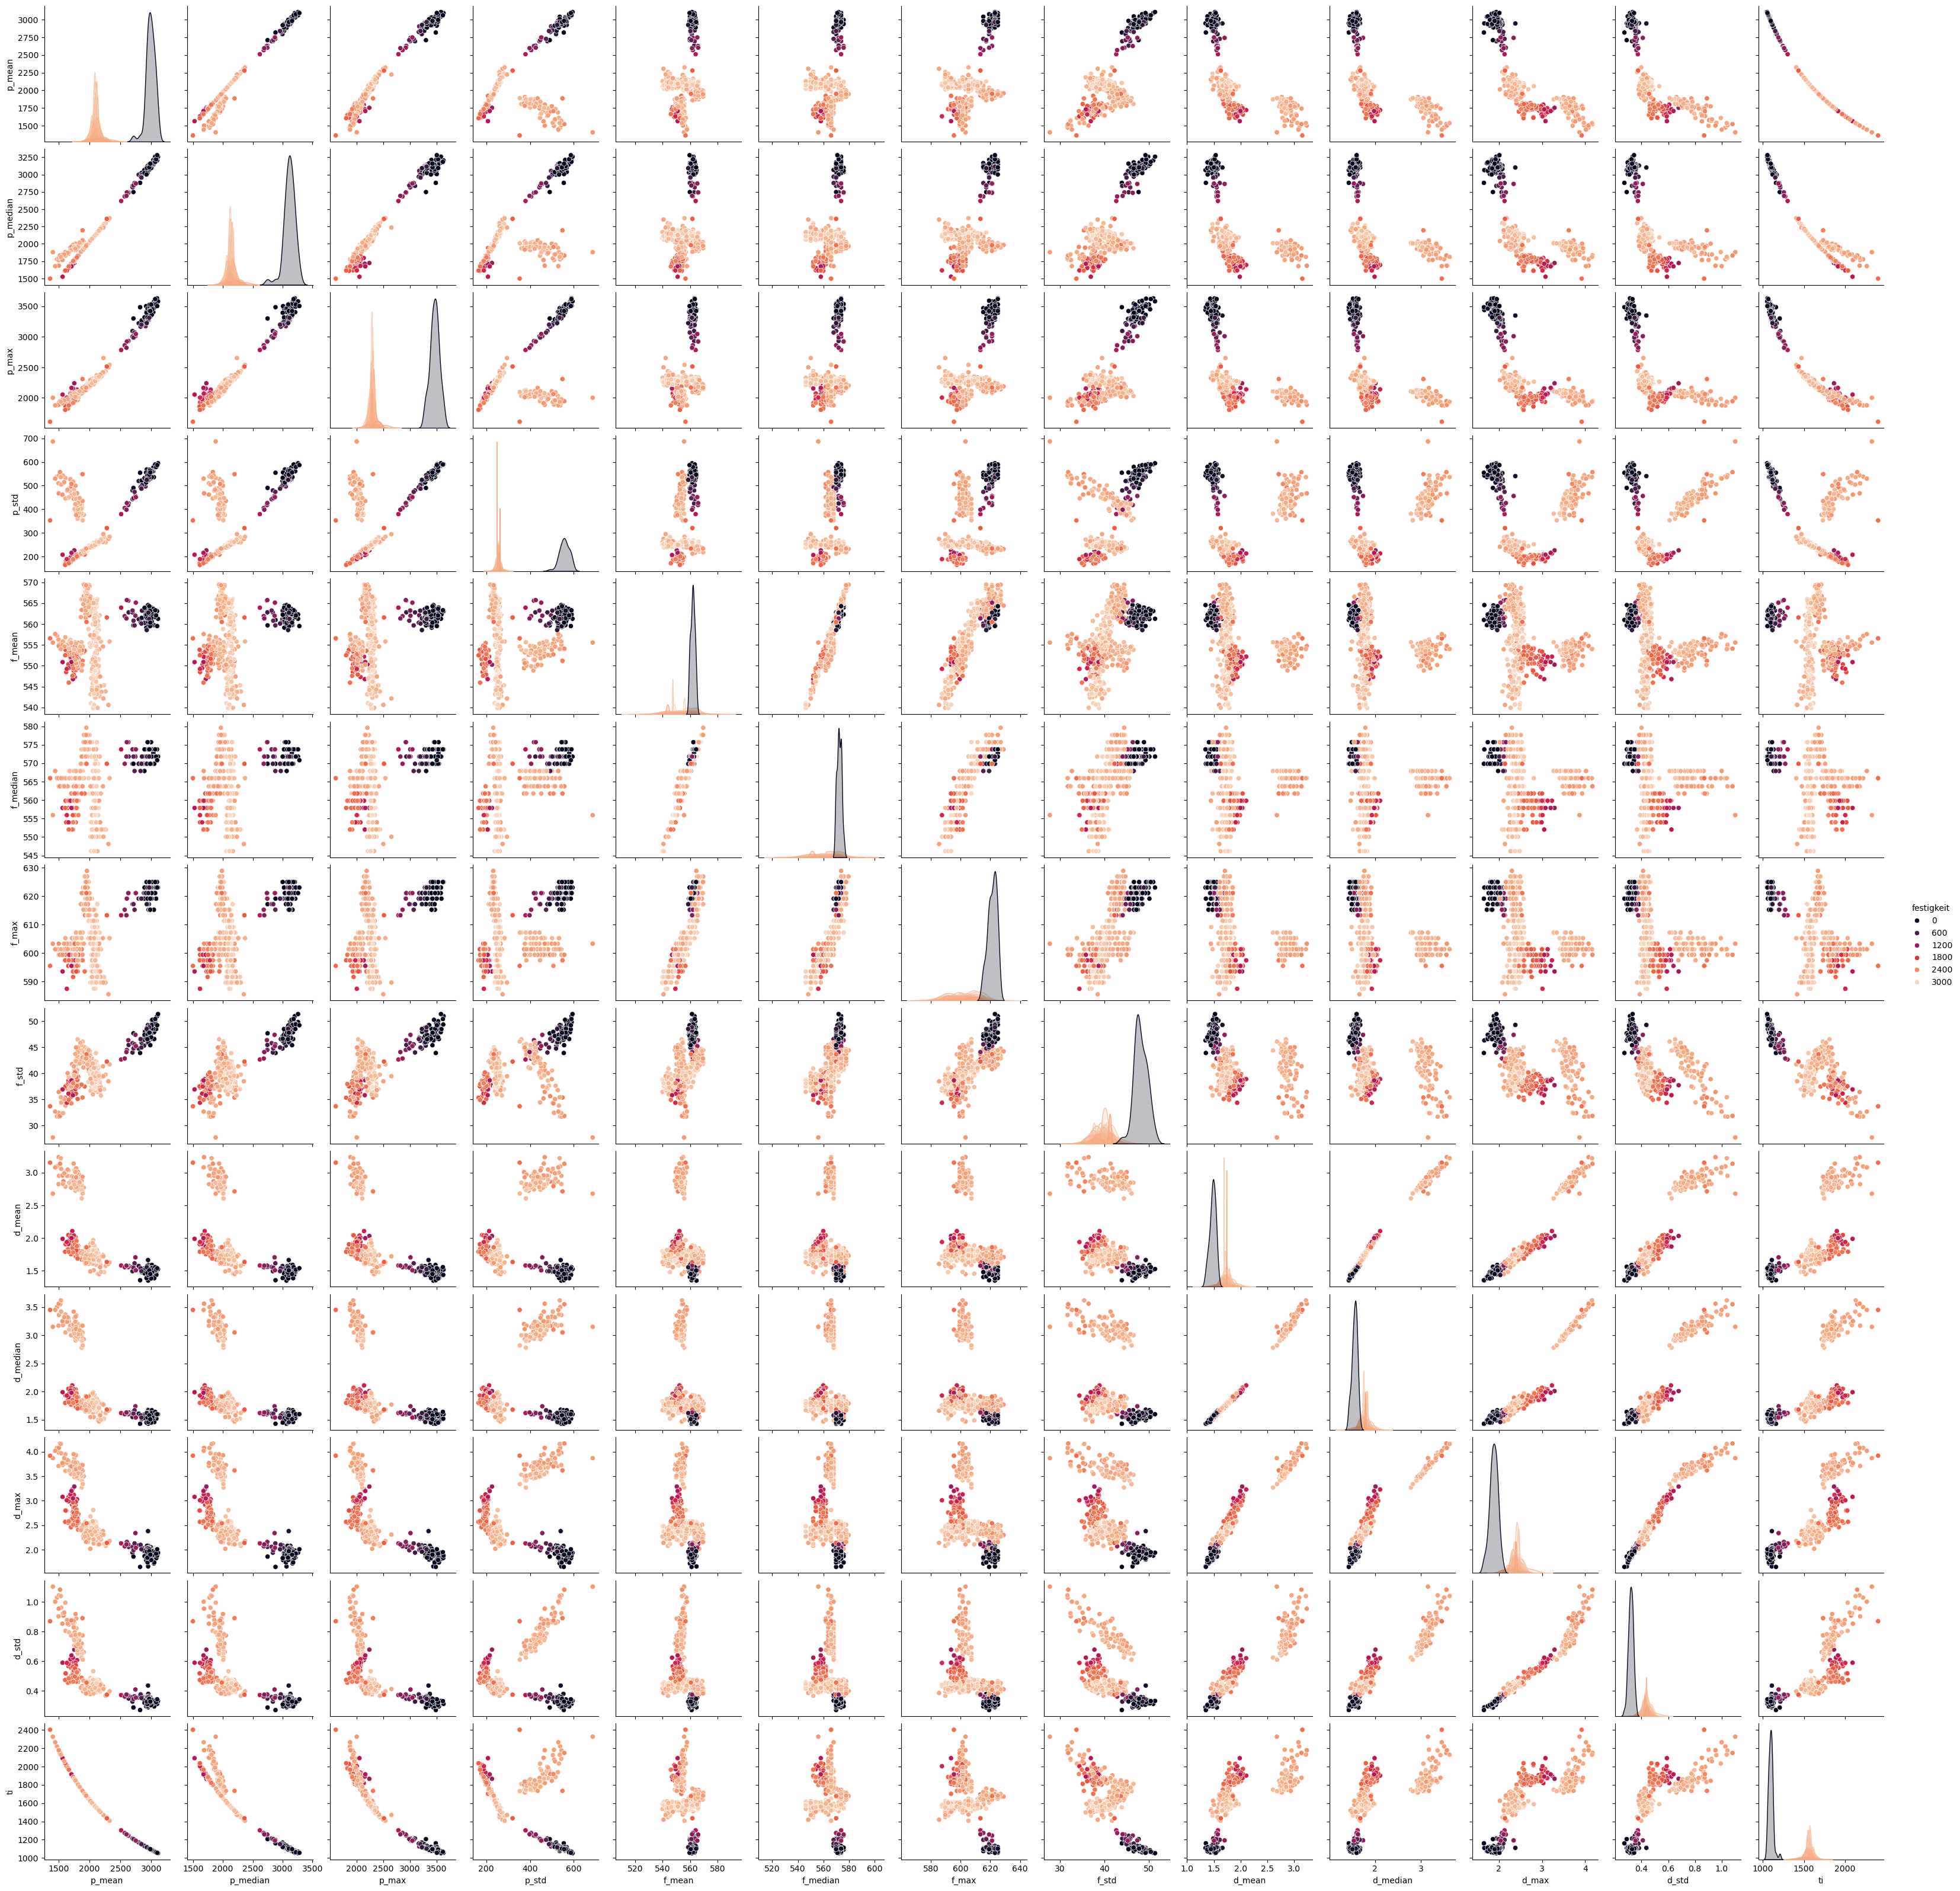

In [34]:
g = sns.pairplot(df, hue='festigkeit', palette='rocket')
plt.show()
                        